In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import matplotlib
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [3]:
data=pd.read_csv("mlfolder/CSV_Files/data_t2.csv")
# data1=np.genfromtxt("mlfolder/CSV_Files/data_t2.csv")

In [4]:
data.shape

(1164, 3)

In [5]:
data.head()

,x,y,class
0,105.651304,234.103266,1
1,121.393521,289.122956,1
2,131.060911,291.336802,1
3,151.637349,247.911784,1
4,123.467110,221.835833,1


In [6]:
X=data.iloc[:,:2]
y=data.iloc[:,2]

In [7]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.1,random_state=102)

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
DT_model=DecisionTreeClassifier(max_depth=3,random_state=102)

In [10]:
DT_model.fit(Xtrain,ytrain)

DecisionTreeClassifier(max_depth=3, random_state=102)

In [11]:
predictions=DT_model.predict(Xtest)

In [12]:
metrics.accuracy_score(ytest,predictions)

0.9572649572649573

In [13]:
print('DECISION TREES')
print(metrics.classification_report(ytest,predictions)) #DT

DECISION TREES
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       101
           1       0.82      0.88      0.85        16

    accuracy                           0.96       117
   macro avg       0.90      0.92      0.91       117
weighted avg       0.96      0.96      0.96       117



**SVM**

In [14]:
from sklearn.svm import SVC

In [15]:
SVC_model=SVC(kernel='rbf',C=1000)

In [16]:
SVC_model.fit(Xtrain,ytrain)

SVC(C=1000)

In [17]:
predictions2=SVC_model.predict(Xtest)

In [18]:
metrics.accuracy_score(ytest,predictions2)

0.9658119658119658

In [19]:
print(metrics.classification_report(ytest,predictions2))#SVM

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       101
           1       0.88      0.88      0.88        16

    accuracy                           0.97       117
   macro avg       0.93      0.93      0.93       117
weighted avg       0.97      0.97      0.97       117



**RANDOM FOREST**

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
RF_model=RandomForestClassifier()

In [22]:
RF_model.fit(Xtrain,ytrain)

RandomForestClassifier()

In [23]:
predictions3=RF_model.predict(Xtest)

In [24]:
metrics.accuracy_score(ytest,predictions3)

0.9658119658119658

In [25]:
print(metrics.classification_report(ytest,predictions3))#RF

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       101
           1       0.88      0.88      0.88        16

    accuracy                           0.97       117
   macro avg       0.93      0.93      0.93       117
weighted avg       0.97      0.97      0.97       117



In [26]:
Xtrain.columns=['Attribute1','Attribute2']
Xtest.columns=Xtrain.columns

**Plotting Decision Boundaries**

/Users/divyamaddipatla/mlfolder/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


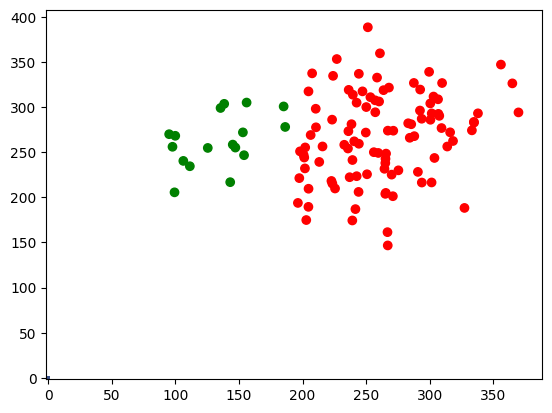

In [30]:
fig,ax=plt.subplots()
h=0.01
xmin=50
xmax=1.5
ymin=-1.5
ymax=1.5
xx,yy=np.meshgrid(np.arange(xmin,xmax,h),np.arange(ymin,ymax,h))
Z=SVC_model.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)
plt.contourf(xx,yy,Z)
# plt.scatter(Xtrain.iloc[:,0],Xtrain.iloc[:,1],c=ytrain,cmap='winter')
plt.scatter(Xtest.iloc[:,0],Xtest.iloc[:,1],c=predictions,cmap=matplotlib.colors.ListedColormap(['red','green']))
plt.show()


/Users/divyamaddipatla/mlfolder/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


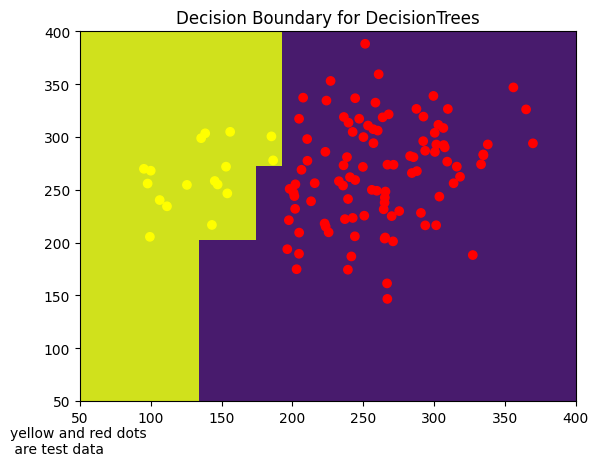

In [28]:
fig,ax=plt.subplots()
xgrid=np.linspace(50,400,4000)
ygrid=np.linspace(50,400,4000)
X,Y=np.meshgrid(xgrid,ygrid)
Z=DT_model.predict(np.c_[X.ravel(),Y.ravel()])
Z=Z.reshape(X.shape)
ax.contourf(X,Y,Z)
# ax.scatter(Xtrain.iloc[:,0],Xtrain.iloc[:,1],c=ytrain,cmap='winter')
ax.scatter(Xtest.iloc[:,0],Xtest.iloc[:,1],c=predictions,cmap=matplotlib.colors.ListedColormap(['red','yellow']))
ax.set_title('Decision Boundary for DecisionTrees')
plt.text(.7,.8,'yellow and red dots \n are test data')
plt.show()

/Users/divyamaddipatla/mlfolder/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


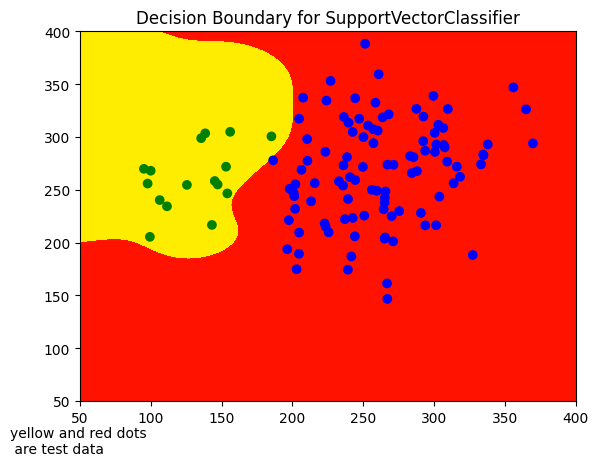

In [31]:
fig,ax=plt.subplots()
xgrid=np.linspace(50,400,4000)
ygrid=np.linspace(50,400,4000)
X,Y=np.meshgrid(xgrid,ygrid)
Z=SVC_model.predict(np.c_[X.ravel(),Y.ravel()])
Z=Z.reshape(X.shape)
ax.contourf(X,Y,Z,cmap='autumn')
# ax.scatter(Xtrain.iloc[:,0],Xtrain.iloc[:,1],c=ytrain,cmap='winter')
ax.scatter(Xtest.iloc[:,0],Xtest.iloc[:,1],c=predictions2,cmap=matplotlib.colors.ListedColormap(['blue','green']))
plt.text(.7,.8,'yellow and red dots \n are test data')
ax.set_title("Decision Boundary for SupportVectorClassifier")
plt.show()

/Users/divyamaddipatla/mlfolder/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


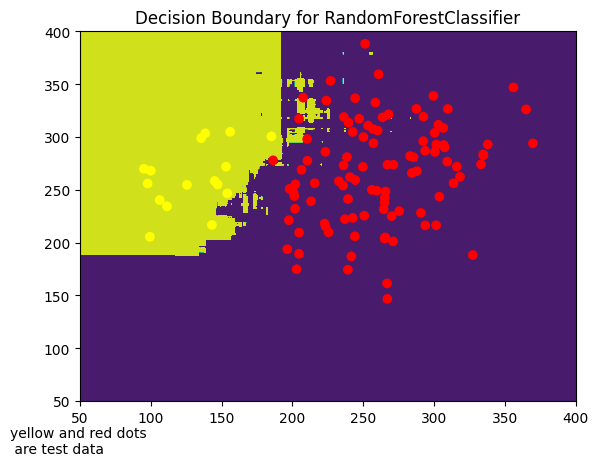

In [30]:
fig,ax=plt.subplots()
xgrid=np.linspace(50,400,4000)
ygrid=np.linspace(50,400,4000)
X,Y=np.meshgrid(xgrid,ygrid)
Z=RF_model.predict(np.c_[X.ravel(),Y.ravel()])
Z=Z.reshape(X.shape)
ax.contourf(X,Y,Z)
# ax.scatter(Xtrain.iloc[:,0],Xtrain.iloc[:,1],c=ytrain,cmap='winter')
ax.scatter(Xtest.iloc[:,0],Xtest.iloc[:,1],c=predictions3,cmap=matplotlib.colors.ListedColormap(['red','yellow']))
plt.text(.7,.8,'yellow and red dots \n are test data')
ax.set_title("Decision Boundary for RandomForestClassifier")
plt.show()


0.9572649572649573 - DT
0.9658119658119658 -SVC
0.9572649572649573 - RF

**Based on Accuracy SVC is preferable because it has 96.58% accuracy and high recall,precision and f1 score**
**If false positives are costly mis-identifying a 0 as a 1 is critical -> precision**
**